# 用训练好的模型预测12.06-12.11的数据

In [1]:
from sklearn.externals import joblib

rf=joblib.load(r'C:\Users\Jeremy\Desktop\rf_time.pickle')
estimator=joblib.load(r'C:\Users\Jeremy\Desktop\estimator_time.pickle')
bc=joblib.load(r'C:\Users\Jeremy\Desktop\bc_time.pickle')
rf2=joblib.load(r'C:\Users\Jeremy\Desktop\rf2_time.pickle')

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_results_time.csv')

967225 data points and 24 features
12048 positive out of 967225 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21545221    1.0       0.551         1.0       0.883       0.509    0.686667
21533559    1.0       0.508         1.0       0.891       0.494    0.667333
21534659    1.0       0.523         1.0       0.922       0.494    0.672333
21546250    1.0       0.530         1.0       0.909       0.578    0.702667
21528498    1.0       0.546         1.0       0.928       0.509    0.685000
...         ...         ...         ...         ...         ...         ...
24010573    0.0       0.000         0.0       0.000       0.000    0.000000
21428917    0.0       0.000         0.0       0.000       0.000    0.000000
28031624    0.0       0.000         0.0       0.000       0.000    0.000000
22698749    0.0       0.000       

In [3]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_results_time.csv')

967281 data points and 24 features
12073 positive out of 967281 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21520741    1.0    0.480000    1.000000    0.895000    0.450000    0.643333
21417202    1.0    0.461000    0.000000    0.832000    0.477000    0.312667
21527060    1.0    0.476000    1.000000    0.861000    0.508000    0.661333
21526276    1.0    0.549000    1.000000    0.879000    0.559000    0.702667
21553527    1.0    0.457000    1.000000    0.924000    0.483000    0.646667
...         ...         ...         ...         ...         ...         ...
22473514    0.0    0.000161    0.015152    0.015366    0.000161    0.005158
24214738    0.0    0.000697    0.048780    0.068537    0.000715    0.016731
21994999    0.0    0.000000    0.000000    0.000000    0.000000    0.000000
22475994    0.0    0.000846    0.0

In [4]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_results_time.csv')

962459 data points and 24 features
12035 positive out of 962459 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21404880    1.0     0.45900    0.000000    0.872000    0.445000    0.301333
21549273    1.0     0.50100    1.000000    0.943000    0.474000    0.658333
21704610    1.0     0.46000    1.000000    0.947000    0.479000    0.646333
21527060    1.0     0.49100    1.000000    0.914000    0.554000    0.681667
21522952    1.0     0.51700    1.000000    0.906000    0.516000    0.677667
...         ...         ...         ...         ...         ...         ...
22808568    0.0     0.00703    0.333333    0.534793    0.006969    0.115777
23261654    0.0     0.00000    0.000000    0.000000    0.000000    0.000000
22926864    0.0     0.00000    0.000000    0.000000    0.000000    0.000000
22570919    0.0     0.00000    0.0

In [5]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_results_time.csv')

983743 data points and 24 features
12055 positive out of 983743 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21545221    1.0    0.534000    1.000000    0.897000    0.523000    0.685667
21522952    1.0    0.437000    0.000000    0.808000    0.488000    0.308333
21457066    1.0    0.455000    1.000000    0.894000    0.466000    0.640333
21717676    1.0    0.456000    1.000000    0.867000    0.479000    0.645000
22381640    1.0    0.522000    1.000000    0.951000    0.486000    0.669333
...         ...         ...         ...         ...         ...         ...
21956223    0.0    0.000000    0.000000    0.001000    0.000000    0.000000
23245538    0.0    0.000278    0.025641    0.028692    0.000273    0.008731
23151497    0.0    0.000000    0.000000    0.000000    0.000000    0.000000
23344634    0.0    0.000000    0.0

In [6]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_results_time.csv')

909614 data points and 24 features
12033 positive out of 909614 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21417202    1.0    0.411000      1.0000    0.812000    0.437000    0.616000
21522952    1.0    0.494000      0.0000    0.886000    0.501000    0.331667
21546250    1.0    0.555000      1.0000    0.934000    0.541000    0.698667
21651679    1.0    0.486000      1.0000    0.859000    0.490000    0.658667
21559243    1.0    0.492000      1.0000    0.943000    0.499000    0.663667
...         ...         ...         ...         ...         ...         ...
23462160    0.0    0.000000      0.0000    0.000000    0.000000    0.000000
21770696    0.0    0.000000      0.0000    0.000000    0.000000    0.000000
22873705    0.0    0.000505      0.0625    0.049378    0.000507    0.021170
23572297    0.0    0.000000      0

In [7]:
import pandas as pd
import numpy as np

df_chuzuche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_title_chuzuche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_chuzuche_feature=df_chuzuche_feature.dropna()#删除所有有空值的行
#df_chuzuche_feature.reset_index(drop=True,inplace=True)#重置索引
df_shehuiche_feature=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_title_shehuiche_time_yueB_regular_zhibiao.csv'),header=0,index_col='car_id')
df_shehuiche_feature=df_shehuiche_feature.dropna()#删除所有有空值的行
#df_shehuiche_feature.reset_index(drop=True,inplace=True)#重置索引
X=pd.concat([df_chuzuche_feature,df_shehuiche_feature])
#X.reset_index(drop=True,inplace=True)#重置索引
y = np.zeros(len(df_chuzuche_feature)+len(df_shehuiche_feature))
y[:len(df_chuzuche_feature)] = 1.0
car_id=list(X.index)#删除只出行一次的车辆，car_id表示出行次数大于1的车辆ID
y = pd.Series(y,index=car_id)
print('%d data points and %d features' % (X.shape))
print('%d positive out of %d total' % (sum(y), len(y)))

results = pd.DataFrame({
    'truth'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores；第i行第j列上的数值是模型预测第i个预测样本为某个标签的概率
}, columns = ['truth', 'output_std'])
print("1111111111111111111111111111111")

results['output_bag']=estimator.predict_proba(X)[:,1]
print("2222222222222222222222222222222222")

results['output_skb'] = bc.predict_proba(X)[:,1]
print("33333333333333333333333333333333")

results['output_stp'] = rf2.predict_proba(X)[:,-1] #6000个样本为1的概率
print("44444444444444444444444444444444444")

results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)#三种方法计算每个样本为1的平均概率。output_std为标准分类，output_bag为bagging分类，output_skb也是bagging分类，output_stp为两步法

results_chuzuche=results.iloc[:len(df_chuzuche_feature)]
print(results)
results.index.name='car_id'
results.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_results_time.csv')

828817 data points and 24 features
12011 positive out of 828817 total
1111111111111111111111111111111
2222222222222222222222222222222222
33333333333333333333333333333333
44444444444444444444444444444444444
          truth  output_std  output_bag  output_skb  output_stp  output_all
21533003    1.0    0.477000    0.000000    0.849000    0.492000    0.323000
21404880    1.0    0.519000    1.000000    0.900000    0.515000    0.678000
21545221    1.0    0.521000    1.000000    0.889000    0.565000    0.695333
21751290    1.0    0.517000    0.000000    0.887000    0.497000    0.338000
22365238    1.0    0.415000    1.000000    0.839000    0.427000    0.614000
...         ...         ...         ...         ...         ...         ...
24151418    0.0    0.000291    0.026316    0.029448    0.000298    0.008968
25522049    0.0    0.000000    0.000000    0.000000    0.000000    0.000000
23454652    0.0    0.000000    0.000000    0.000000    0.000000    0.000000
21898981    0.0    0.001338    0.1

# 将12.05-12.11的预测结果合并

In [1]:
import pandas as pd
import numpy as np

results_1205=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161205_results_time.csv'),header=0)
results_1205.rename(columns={'truth':'truth_05', 'label':'label_05', 'output_std':'output_std_05', 'output_bag':'output_bag_05', 
                             'output_skb':'output_skb_05', 'output_stp':'output_stp_05', 'output_all':'output_all_05'}, inplace = True)
results_1206=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161206_results_time.csv'),header=0)
results_1206.rename(columns={'truth':'truth_06', 'output_std':'output_std_06', 'output_bag':'output_bag_06', 
                             'output_skb':'output_skb_06', 'output_stp':'output_stp_06', 'output_all':'output_all_06'}, inplace = True)
results_1207=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161207_results_time.csv'),header=0)
results_1207.rename(columns={'truth':'truth_07', 'output_std':'output_std_07', 'output_bag':'output_bag_07', 
                             'output_skb':'output_skb_07', 'output_stp':'output_stp_07', 'output_all':'output_all_07'}, inplace = True)
results_1208=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161208_results_time.csv'),header=0)
results_1208.rename(columns={'truth':'truth_08', 'output_std':'output_std_08', 'output_bag':'output_bag_08', 
                             'output_skb':'output_skb_08', 'output_stp':'output_stp_08', 'output_all':'output_all_08'}, inplace = True)
results_1209=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161209_results_time.csv'),header=0)
results_1209.rename(columns={'truth':'truth_09', 'output_std':'output_std_09', 'output_bag':'output_bag_09', 
                             'output_skb':'output_skb_09', 'output_stp':'output_stp_09', 'output_all':'output_all_09'}, inplace = True)
results_1210=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161210_results_time.csv'),header=0)
results_1210.rename(columns={'truth':'truth_10', 'output_std':'output_std_10', 'output_bag':'output_bag_10', 
                             'output_skb':'output_skb_10', 'output_stp':'output_stp_10', 'output_all':'output_all_10'}, inplace = True)
results_1211=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\20161211_results_time.csv'),header=0)
results_1211.rename(columns={'truth':'truth_11', 'output_std':'output_std_11', 'output_bag':'output_bag_11', 
                             'output_skb':'output_skb_11', 'output_stp':'output_stp_11', 'output_all':'output_all_11'}, inplace = True)

In [2]:
print('1206总出租车数量：%d'%(len(results_1206[results_1206['truth_06']==1])))
print('1206识别出的出租车数量：%d'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==1)])))
print('1206出租车识别准确率：%f'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==1)])/len(results_1206[results_1206['truth_06']==1])))
print('1206总社会车数量：%d'%(len(results_1206[results_1206['truth_06']==0])))
print('1206社会车中识别出的运营车数量：%d'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==0)])))
print('1206社会车中运营比例：%f'%(len(results_1206[(results_1206['output_bag_06']==1) & (results_1206['truth_06']==0)])/len(results_1206[results_1206['truth_06']==0])))

print('1207总出租车数量：%d'%(len(results_1207[results_1207['truth_07']==1])))
print('1207识别出的出租车数量：%d'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==1)])))
print('1207出租车识别准确率：%f'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==1)])/len(results_1207[results_1207['truth_07']==1])))
print('1207总社会车数量：%d'%(len(results_1207[results_1207['truth_07']==0])))
print('1207社会车中识别出的运营车数量：%d'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==0)])))
print('1207社会车中运营比例：%f'%(len(results_1207[(results_1207['output_bag_07']==1) & (results_1207['truth_07']==0)])/len(results_1207[results_1207['truth_07']==0])))

print('1208总出租车数量：%d'%(len(results_1208[results_1208['truth_08']==1])))
print('1208识别出的出租车数量：%d'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==1)])))
print('1208出租车识别准确率：%f'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==1)])/len(results_1208[results_1208['truth_08']==1])))
print('1208总社会车数量：%d'%(len(results_1208[results_1208['truth_08']==0])))
print('1208社会车中识别出的运营车数量：%d'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==0)])))
print('1208社会车中运营比例：%f'%(len(results_1208[(results_1208['output_bag_08']==1) & (results_1208['truth_08']==0)])/len(results_1208[results_1208['truth_08']==0])))

print('1209总出租车数量：%d'%(len(results_1209[results_1209['truth_09']==1])))
print('1209识别出的出租车数量：%d'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==1)])))
print('1209出租车识别准确率：%f'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==1)])/len(results_1209[results_1209['truth_09']==1])))
print('1209总社会车数量：%d'%(len(results_1209[results_1209['truth_09']==0])))
print('1209社会车中识别出的运营车数量：%d'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==0)])))
print('1209社会车中运营比例：%f'%(len(results_1209[(results_1209['output_bag_09']==1) & (results_1209['truth_09']==0)])/len(results_1209[results_1209['truth_09']==0])))

print('1210总出租车数量：%d'%(len(results_1210[results_1210['truth_10']==1])))
print('1210识别出的出租车数量：%d'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==1)])))
print('1210出租车识别准确率：%f'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==1)])/len(results_1210[results_1210['truth_10']==1])))
print('1210总社会车数量：%d'%(len(results_1210[results_1210['truth_10']==0])))
print('1210社会车中识别出的运营车数量：%d'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==0)])))
print('1210社会车中运营比例：%f'%(len(results_1210[(results_1210['output_bag_10']==1) & (results_1210['truth_10']==0)])/len(results_1210[results_1210['truth_10']==0])))

print('1211总出租车数量：%d'%(len(results_1211[results_1211['truth_11']==1])))
print('1211识别出的出租车数量：%d'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==1)])))
print('1211出租车识别准确率：%f'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==1)])/len(results_1211[results_1211['truth_11']==1])))
print('1211总社会车数量：%d'%(len(results_1211[results_1211['truth_11']==0])))
print('1211社会车中识别出的运营车数量：%d'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==0)])))
print('1211社会车中运营比例：%f'%(len(results_1211[(results_1211['output_bag_11']==1) & (results_1211['truth_11']==0)])/len(results_1211[results_1211['truth_11']==0])))

1206总出租车数量：12048
1206识别出的出租车数量：10436
1206出租车识别准确率：0.866202
1206总社会车数量：955177
1206社会车中识别出的运营车数量：107228
1206社会车中运营比例：0.112260
1207总出租车数量：12073
1207识别出的出租车数量：10478
1207出租车识别准确率：0.867887
1207总社会车数量：955208
1207社会车中识别出的运营车数量：108251
1207社会车中运营比例：0.113327
1208总出租车数量：12035
1208识别出的出租车数量：10493
1208出租车识别准确率：0.871874
1208总社会车数量：950424
1208社会车中识别出的运营车数量：108439
1208社会车中运营比例：0.114095
1209总出租车数量：12055
1209识别出的出租车数量：10635
1209出租车识别准确率：0.882207
1209总社会车数量：971688
1209社会车中识别出的运营车数量：112817
1209社会车中运营比例：0.116104
1210总出租车数量：12033
1210识别出的出租车数量：10571
1210出租车识别准确率：0.878501
1210总社会车数量：897581
1210社会车中识别出的运营车数量：105722
1210社会车中运营比例：0.117785
1211总出租车数量：12011
1211识别出的出租车数量：10376
1211出租车识别准确率：0.863875
1211总社会车数量：816806
1211社会车中识别出的运营车数量：91083
1211社会车中运营比例：0.111511


In [10]:
results0506=pd.merge(results_1205,results_1206,how='outer',on='car_id')
results050607=pd.merge(results0506,results_1207,how='outer',on='car_id')
results05060708=pd.merge(results050607,results_1208,how='outer',on='car_id')
results0506070809=pd.merge(results05060708,results_1209,how='outer',on='car_id')
results050607080910=pd.merge(results0506070809,results_1210,how='outer',on='car_id')
results05060708091011=pd.merge(results050607080910,results_1211,how='outer',on='car_id')
print(results05060708091011)

           car_id  truth_05  label_05  output_std_05  output_bag_05  \
0        21522952       1.0       1.0          0.809            NaN   
1        21541449       1.0       1.0          0.822            NaN   
2        21520990       1.0       1.0          0.795            NaN   
3        21706894       1.0       1.0          0.819            NaN   
4        21522729       1.0       1.0          0.814            NaN   
...           ...       ...       ...            ...            ...   
1857223  23718847       NaN       NaN            NaN            NaN   
1857224  25607727       NaN       NaN            NaN            NaN   
1857225  22465509       NaN       NaN            NaN            NaN   
1857226  23209775       NaN       NaN            NaN            NaN   
1857227  21898981       NaN       NaN            NaN            NaN   

         output_skb_05  output_stp_05  output_all_05  truth_06  output_std_06  \
0                  NaN          0.809         0.8090       1.0    

In [11]:
results05060708091011['truth_05']=results05060708091011['truth_05'].fillna(0)
results05060708091011['truth_06']=results05060708091011['truth_06'].fillna(0)
results05060708091011['truth_07']=results05060708091011['truth_07'].fillna(0)
results05060708091011['truth_08']=results05060708091011['truth_08'].fillna(0)
results05060708091011['truth_09']=results05060708091011['truth_09'].fillna(0)
results05060708091011['truth_10']=results05060708091011['truth_10'].fillna(0)
results05060708091011['truth_11']=results05060708091011['truth_11'].fillna(0)
results05060708091011['truth_05']=results05060708091011['truth_05']+results05060708091011['truth_06']+results05060708091011['truth_07']+\
                                    results05060708091011['truth_08']+results05060708091011['truth_09']+\
                                    results05060708091011['truth_10']+results05060708091011['truth_11']
results05060708091011=results05060708091011.drop(columns=['truth_06','truth_07','truth_08','truth_09','truth_10','truth_11'])

results05060708091011.loc[results05060708091011['truth_05']>=1 , 'truth_05']=1
print(results05060708091011['truth_05'])

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1857223    0.0
1857224    0.0
1857225    0.0
1857226    0.0
1857227    0.0
Name: truth_05, Length: 1857228, dtype: float64


In [12]:
results05060708091011.rename(columns={'truth_05':'truth'}, inplace = True)
results05060708091011['output_std_mean']=results05060708091011[['output_std_06','output_std_07','output_std_08','output_std_09','output_std_10','output_std_11']].mean(axis=1)
results05060708091011['output_bag_mean']=results05060708091011[['output_bag_06','output_bag_07','output_bag_08','output_bag_09','output_bag_10','output_bag_11']].mean(axis=1)
results05060708091011['output_skb_mean']=results05060708091011[['output_skb_06','output_skb_07','output_skb_08','output_skb_09','output_skb_10','output_skb_11']].mean(axis=1)
results05060708091011['output_stp_mean']=results05060708091011[['output_stp_06','output_stp_07','output_stp_08','output_stp_09','output_stp_10','output_stp_11']].mean(axis=1)
results05060708091011.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\results_time.csv',index=False)

In [13]:
print(results05060708091011.columns)

Index(['car_id', 'truth', 'label_05', 'output_std_05', 'output_bag_05',
       'output_skb_05', 'output_stp_05', 'output_all_05', 'output_std_06',
       'output_bag_06', 'output_skb_06', 'output_stp_06', 'output_all_06',
       'output_std_07', 'output_bag_07', 'output_skb_07', 'output_stp_07',
       'output_all_07', 'output_std_08', 'output_bag_08', 'output_skb_08',
       'output_stp_08', 'output_all_08', 'output_std_09', 'output_bag_09',
       'output_skb_09', 'output_stp_09', 'output_all_09', 'output_std_10',
       'output_bag_10', 'output_skb_10', 'output_stp_10', 'output_all_10',
       'output_std_11', 'output_bag_11', 'output_skb_11', 'output_stp_11',
       'output_all_11', 'output_std_mean', 'output_bag_mean',
       'output_skb_mean', 'output_stp_mean'],
      dtype='object')


In [14]:
results_chuzuche=results05060708091011[results05060708091011['truth']==1]
results_chuzuche.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\results_time_chuzuche.csv',index=False)

In [15]:
results_shehuiche=results05060708091011[results05060708091011['truth']==0]
results_shehuiche.to_csv(r'C:\Users\Jeremy\Desktop\2019.12.18\results_time_shehuiche.csv',index=False)

In [16]:
print(results05060708091011.shape)

(1857228, 42)


In [17]:
print((results_shehuiche['output_bag_mean']>=1).sum())#和预计40,000接近
print((results_shehuiche['output_std_mean']>=0.04).sum())#和预计40,000接近
print((results_shehuiche['output_skb_mean']>=0.45).sum())#和预计40,000接近
print((results_shehuiche['output_stp_mean']>=0.035).sum())#和预计40,000接近

26389
34683
64714
37549


# 图表

In [18]:
import matplotlib.pylab as plt

# Performance graphing
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8


results05060708091011=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\results_time.csv'),header=0,index_col='car_id')
results_chuzuche=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\results_time_chuzuche.csv'),header=0,index_col='car_id')
results_shehuiche=pd.read_csv(open(r'C:\Users\Jeremy\Desktop\2019.12.18\results_time_shehuiche.csv'),header=0,index_col='car_id')

D:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


[-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8]


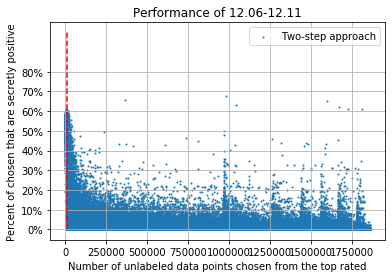

In [19]:
plt.scatter(  #画散点图
    range(len(results05060708091011)), list(results05060708091011['output_stp_mean']),
    s=1  #点大小
)

vals = plt.gca().get_yticks()  #vals为y轴的刻度位置列表
print(vals)
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals]) #在y轴原刻度位置vals上修改数值
plt.xlabel('Number of unlabeled data points chosen from the top rated')
plt.ylabel('Percent of chosen that are secretly positive')
plt.legend([
    'Two-step approach'
])
plt.plot([len(results_chuzuche), len(results_chuzuche)], [0, 1 ], 'r--')
plt.title('Performance of 12.06-12.11')
plt.grid()
plt.show()

[-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8]


D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


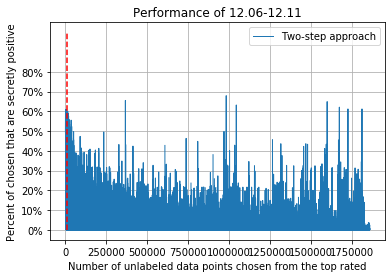

In [20]:
plt.plot(#画折线图
    range(len(results05060708091011)), list(results05060708091011['output_stp_mean']),
    lw = 1 #折线图的线条宽度
)

vals = plt.gca().get_yticks()  #vals为y轴的刻度位置列表
print(vals)
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals]) #在y轴原刻度位置vals上修改数值
plt.xlabel('Number of unlabeled data points chosen from the top rated')
plt.ylabel('Percent of chosen that are secretly positive')
plt.legend([
    'Two-step approach'
])
plt.plot([len(results_chuzuche), len(results_chuzuche)], [0, 1 ], 'r--')
plt.title('Performance of 12.06-12.11')
plt.grid()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


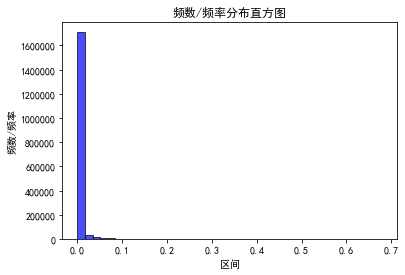

In [21]:
import matplotlib
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


plt.hist(results05060708091011['output_stp_mean'], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()